# Individual Data Generation Example
For the individual data generation, the probability to have a true positive label is dependant on the previous predictions for the individual. The number of positive and negative predictions defines, how close an individual is to the decision boundary.

In [1]:
import sys
import numpy as np
sys.path.append("../")

from sklearn.linear_model import LogisticRegression
from aif360.algorithms.inprocessing import PrejudiceRemover

from long_term_fairness.ltf_plot import LongTermFairnessPlot
from long_term_fairness.ltf_data.individual_data_generator import DataGenerator as IndDataGen
from long_term_fairness.ltf_aif.longterm_aif import AifLongTermMetric, AifLongTermPrediction

Import error: No module named 'tensorflow'


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
generator = IndDataGen(mean_pos=[0, 1],
                       mean_neg=[8, 9],
                       num_positive_label=100,
                       num_negative_label=100,
                       discrimination_factor=.9)

In [4]:
metric = AifLongTermMetric()

In [5]:
clf = AifLongTermPrediction(PrejudiceRemover())

In [6]:
l = LongTermFairnessPlot(generator, clf, metric.metric, x_lim=[-3, 12], y_lim=[-1, 13])

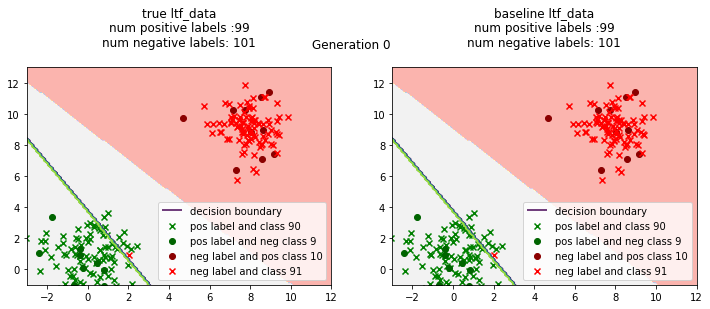

In [7]:
l.init_data()
l.plot_generation()

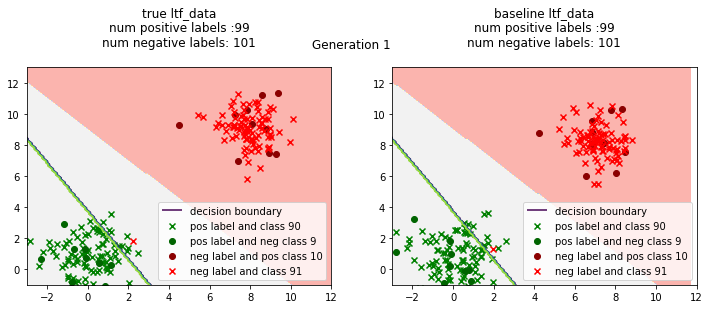

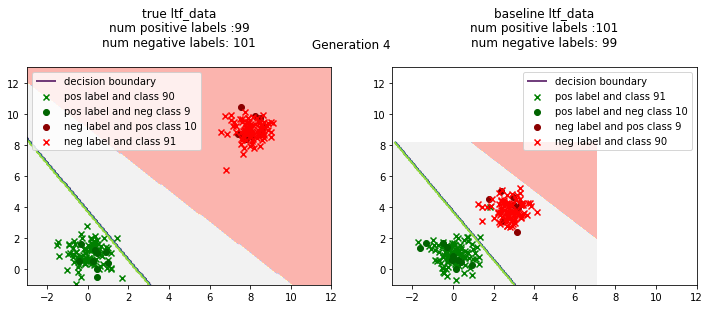

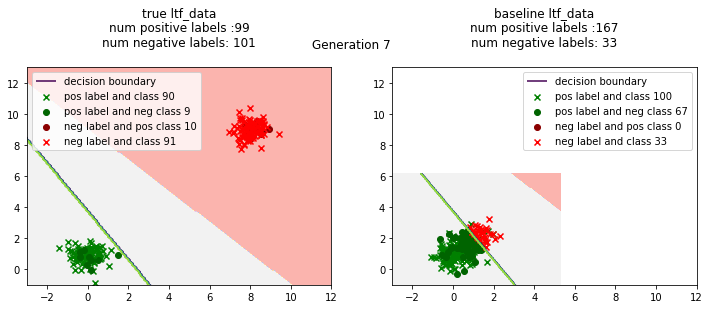

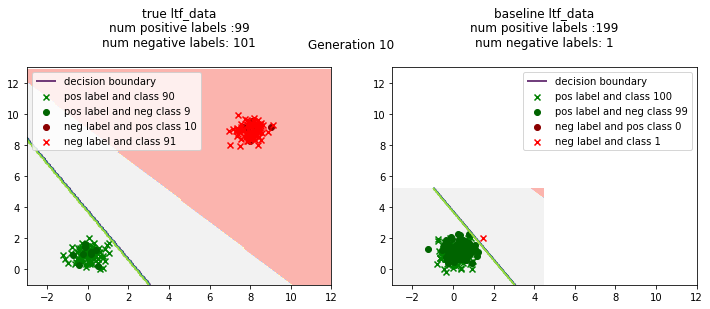

In [8]:
for i in range(10):

    l.run_generation()
    l._run_baseline_generation()
    if i % 3 == 0:
        l.plot_generation()

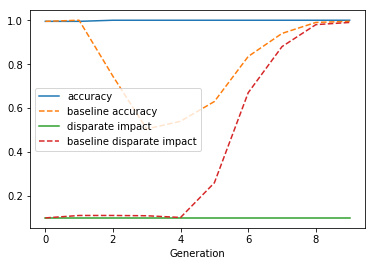

In [9]:
l.plot(["accuracy", "disparate impact"])

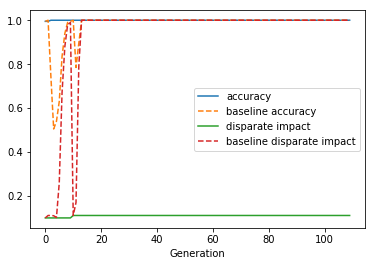

In [10]:
l.run(100)
l.plot(["accuracy", "disparate impact"])